# seaborn可视化练习参考答案

#### 说明:

- 来源：来自于网络搜索，笔记整理，当期及往期优秀同学练习等途径
- 使用：该答案仅供参考，非唯一固定答案

In [4]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14,7)
sns.set_context('poster')

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [23]:
data_flights = sns.load_dataset("flights")
data_flights.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


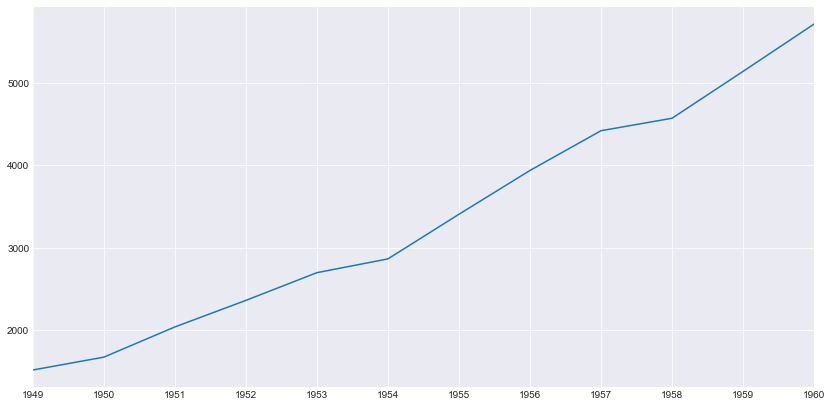

In [26]:
# 分析年度乘客总量变化情况
group_by_year = data_flights.groupby(['year'])['passengers'].sum()
xlabels = group_by_year.index.tolist()
ax = sns.tsplot(data=group_by_year)
ax.set_xticks(range(len(xlabels)))
_ = ax.set_xticklabels(xlabels)

#tsplot可以的，你也可以看看factorplot

<font color='red'>乘客总量是逐年呈线性递增的</font>

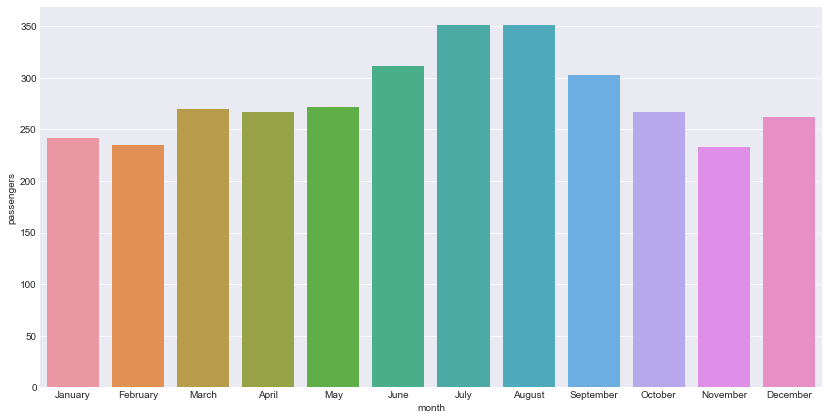

In [35]:
# 分析乘客在一年中各月份的分布
group_by_month = data_flights.groupby(['month'])['passengers'].mean().reset_index()
sns.barplot(x='month',y='passengers',data=group_by_month)

<font color='red'> 每年的航空公司的旺季大约从6月份开始持续到8月底，9月份客流量开始下降，10月份后会进入淡季，12月到来年5月保持较平稳的客流状态 </font>

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [3]:
data_iris = sns.load_dataset("iris")
data_iris['sepal_size'] = data_iris['sepal_length'] * data_iris['sepal_width']
data_iris['petal_size'] = data_iris['petal_length'] * data_iris['petal_width']
data_iris.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_size,petal_size
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


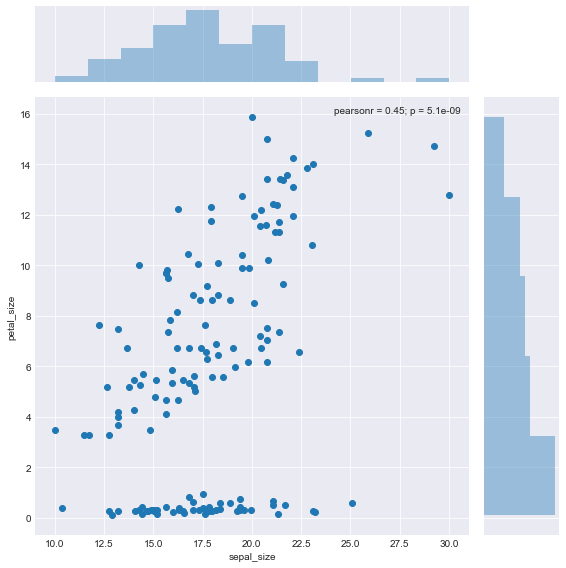

In [4]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
sns.jointplot(x='sepal_size', y='petal_size', data=data_iris, size=8)

<font color='red'>pearson系数约为0.45，萼片（sepal）和花瓣（petal）的大小没有太明显的线性关系 </font>

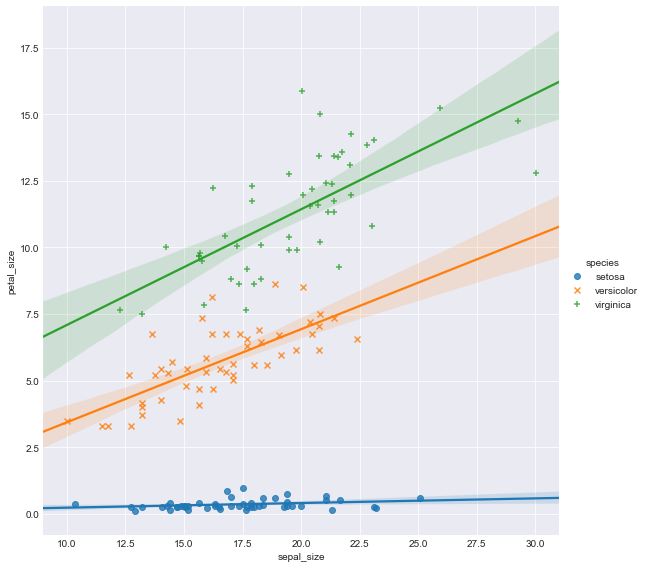

In [5]:
# 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
sns.lmplot(x='sepal_size', y='petal_size', hue='species', data=data_iris, size=8, markers=['o','x','+'])

<font color='red'>可以看到，在给定花的种类的情况下， 花萼片和花瓣的大小呈现出比较明显的线性关系。如果是做花的种类的分类，可以考虑花萼片大小和花瓣大小这两个组合特征</font>

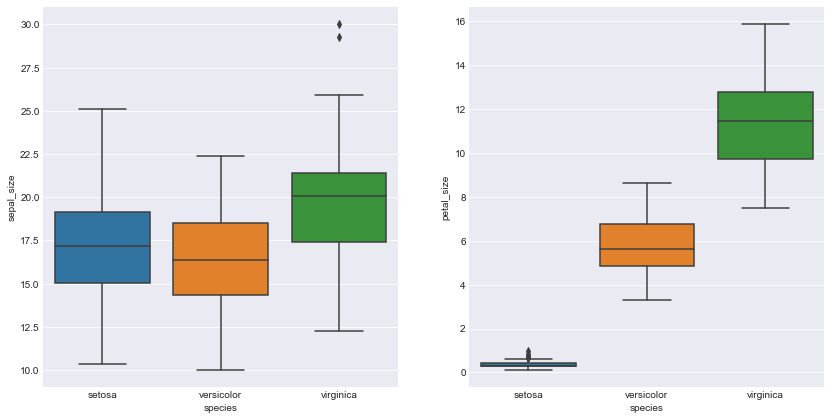

In [20]:
# 不同种类鸢尾花萼片和花瓣大小的分布情况
f, axes = plt.subplots(1,2,figsize=(14,7))
sns.boxplot(x='species', y='sepal_size', data=data_iris, ax=axes[0])
sns.boxplot(x='species', y='petal_size', data=data_iris, ax=axes[1])

<font color='red'>
1. 从花萼片大小来看，virginoca的花萼片一般要比另外两种花大一些，且大部分的virginoca的花萼片都比较大(箱线图右偏)；setosa的花萼片大小居中，versicolor相对较小<br>
2. 从花瓣大小来看，virginoca的花瓣比另外两种大得多；versicolor的花瓣大小居中，setosa的花瓣最小，且几乎所有setosa样本的花瓣大小都集中在0.5左右(箱体非常短)
</font>

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [161]:
data_tips = sns.load_dataset("tips")
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


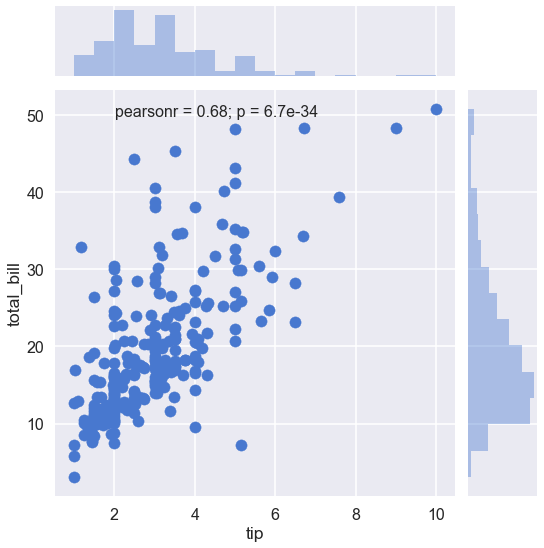

In [162]:
# your code
# 小费和总消费之间的关系
sns.jointplot(x='tip',y='total_bill',data=data_tips, size=8)

<font color='red'>小费金额和总消费之间表现出较明显的线性关系，说明一般就餐金额比较大的顾客所给的小费会比较多</font>

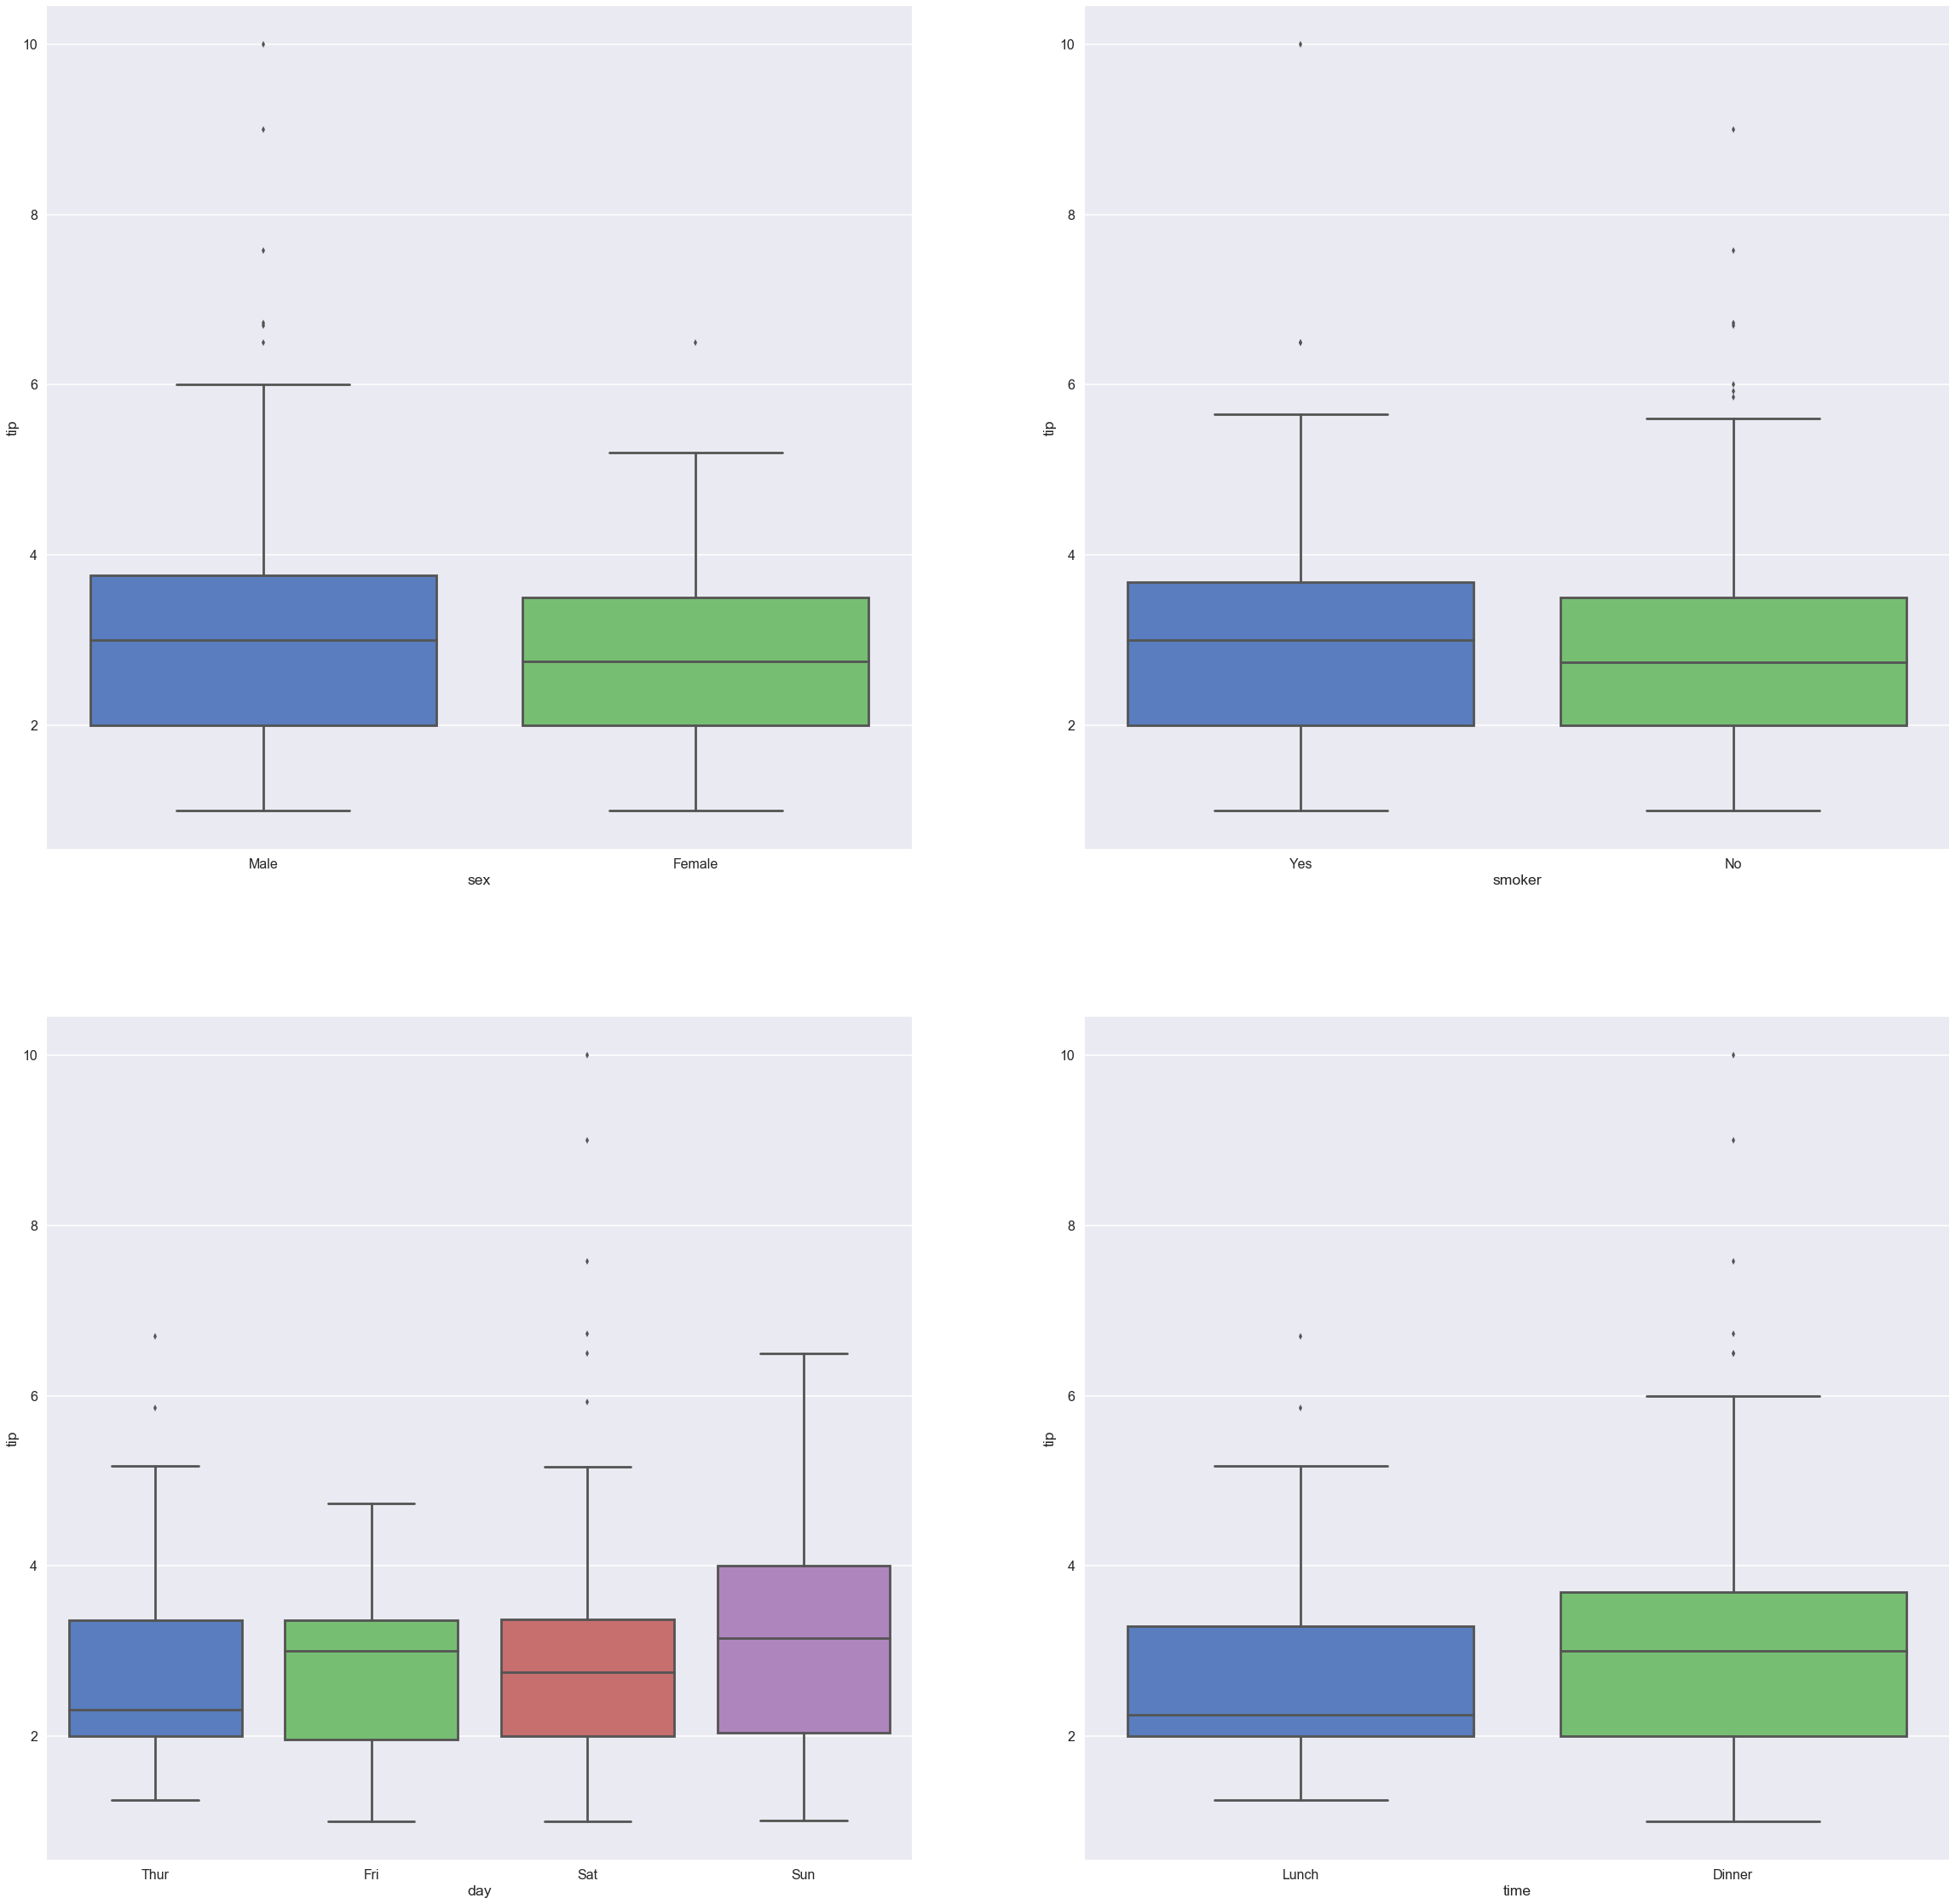

In [163]:
# 男性顾客和女性顾客，谁更慷慨（分类箱式图）
# 抽烟与否是否会对小费金额产生影响（分类箱式图）
# 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
# 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
fg, axes = plt.subplots(2,2,figsize=(40,40))
x_labels = ['sex','smoker','day','time']
y_labels = ['tip']
for i,ax in enumerate(axes.flatten()):
    ax = sns.boxplot(x=x_labels[i], y=y_labels[0], data=data_tips, ax=ax)
#     ax.tick_params(axis='both',labelsize=10) 

<font color='red'>
1. 男性顾客相对于女性顾客给的小费会多一些，且大部分的男性顾客给的小费都算比较高(箱型图右偏)<br>
2. 抽烟的顾客比没有抽烟的顾客会慷慨一些，且抽烟顾客给的小费都算比较高<br>
3. 星期天的顾客给的小费会比周四到周六的顾客多一些，周六的土豪貌似比较多(离群点)，周四的顾客大部分给的小费都比较多<br>
4. 晚餐顾客给的小费比午餐的顾客多，且午餐大部分顾客给的小费都比较少<br>
<br>
ps:所以一个懂数据数据分析的服务员感觉可以多赚不少钱~

</font>

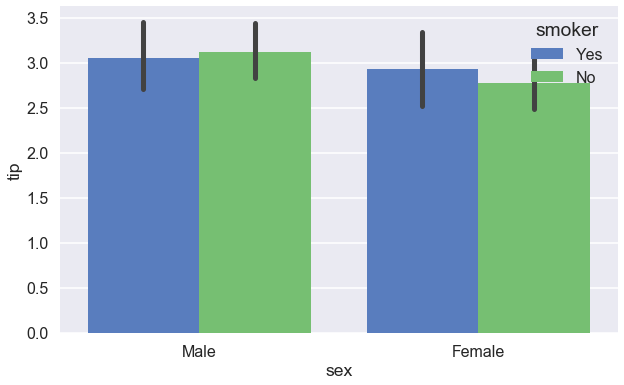

In [164]:
# 性别+抽烟的组合因素对慷慨度的影响
fg = plt.figure(figsize=(10,6))
ax = fg.add_subplot(111)
sns.barplot(x='sex', y='tip', hue='smoker',data=data_tips,ax=ax)
ax.legend(loc='upper right',title='smoker')

<font color='red'>
1. 对于男性顾客来说，抽烟和不抽烟对给的小费的多少没有明显差别<br>
2. 对于女性顾客来讲，抽烟的顾客一般来说比不抽烟的顾客要有钱一点，给的小费也相对多一点<br>

</font>

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [52]:
data_titanic = sns.load_dataset("titanic")
data_titanic.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


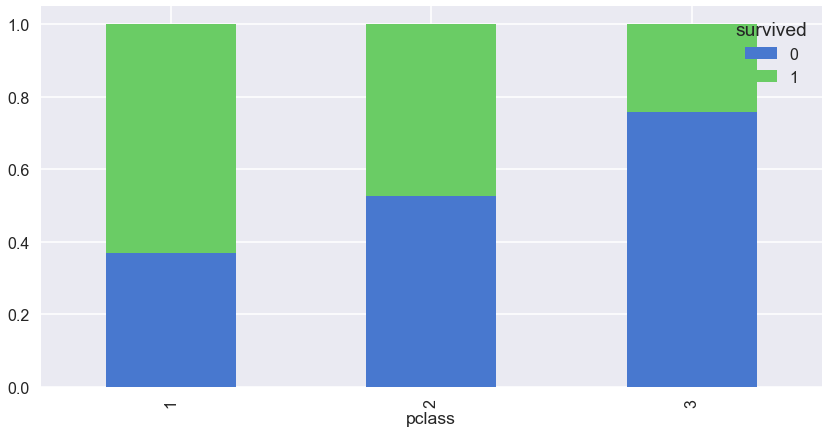

In [148]:
# your code
# 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
import numpy as np
sns.set_palette(sns.color_palette('muted'))
def stackedPlot(x, y, data, ):
    def group_func(s):
        return s.value_counts()/s.value_counts().sum()   
    df = data.groupby(x)[y].apply(group_func).unstack()
    ax = df.plot(kind='bar', stacked=True)
    ax.legend(loc='best',title=y)
stackedPlot('pclass','survived',data_titanic)

<font color='red'>
很明显，仓位等级越高，获救的比例就越大。所以有钱人还是会被优待的。。
</font>

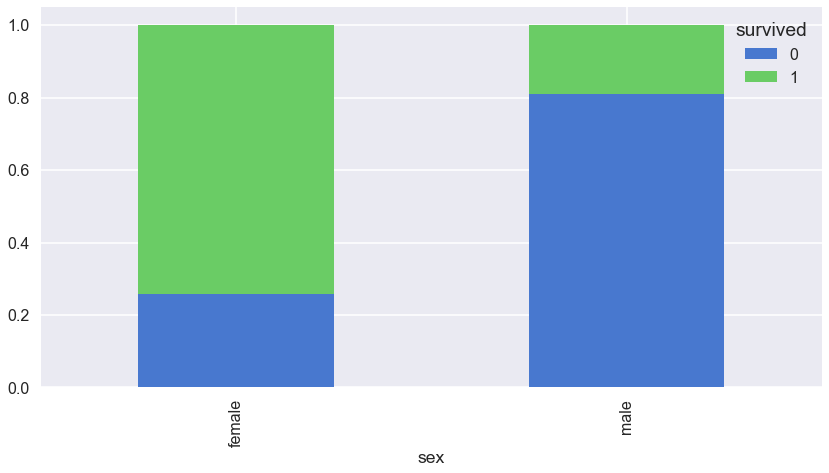

In [149]:
# 不同性别的幸存比例（堆积柱状图）
stackedPlot('sex','survived',data_titanic)

<font color='red'>
女性获救的比例比男性高很多，说明大部分外国人还是很gentlemen的，女士优先
</font>

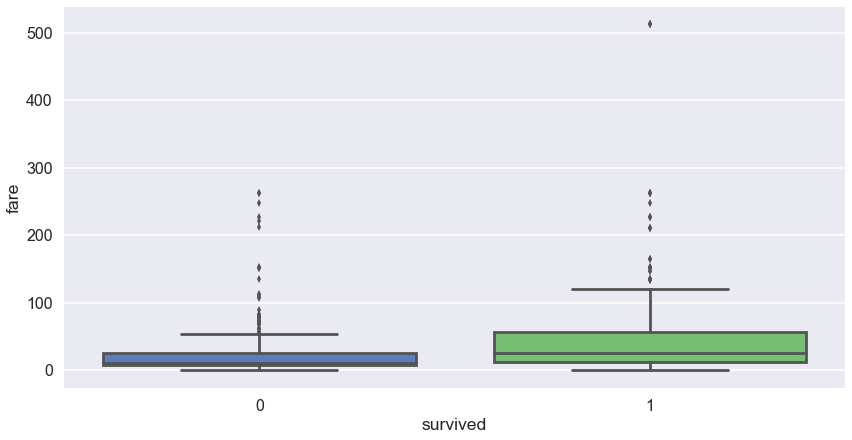

In [150]:
# 幸存和遇难乘客的票价分布（分类箱式图）
sns.boxplot(x='survived',y='fare',data=data_titanic)

<font color='red'>
结论跟仓位的分布差不多。获救的人里面大部分都是有钱人，相对的，死去的人里面几乎都是穷人。。
</font>

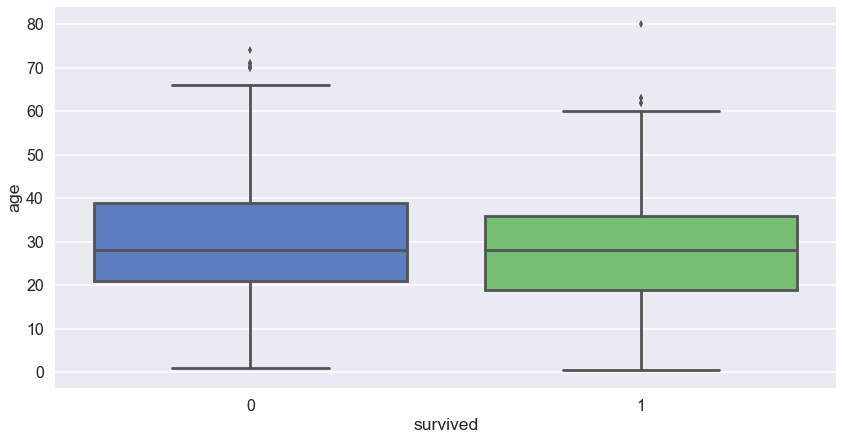

In [151]:
# 幸存和遇难乘客的年龄分布（分类箱式图）
sns.boxplot(x='survived',y='age',data=data_titanic)

<font color='red'>
获救和未获救的人的年龄分布没有太大差别
</font>

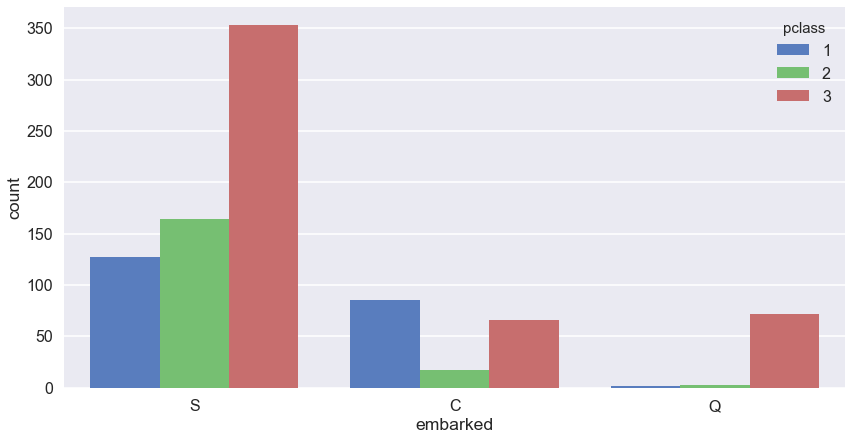

In [152]:
# 不同上船港口的乘客仓位等级分布（分组柱状图）
sns.countplot(x='embarked', hue='pclass', data=data_titanic)

<font color='red'>
1. 从S口登船的人数最多，C口次之，Q口上船的人最少<br>
2. S口登船的人中，3等仓的比例比较大<br>
3. C口的登船的人中，2等仓的比例比较小<br>
4. Q口登船的基本都穷人<br>
5. 可以看出S是比较大众化的码头，而C码头附近的夫人相对较多，Q码头附近几乎都是普通的老百姓<br>
</font>

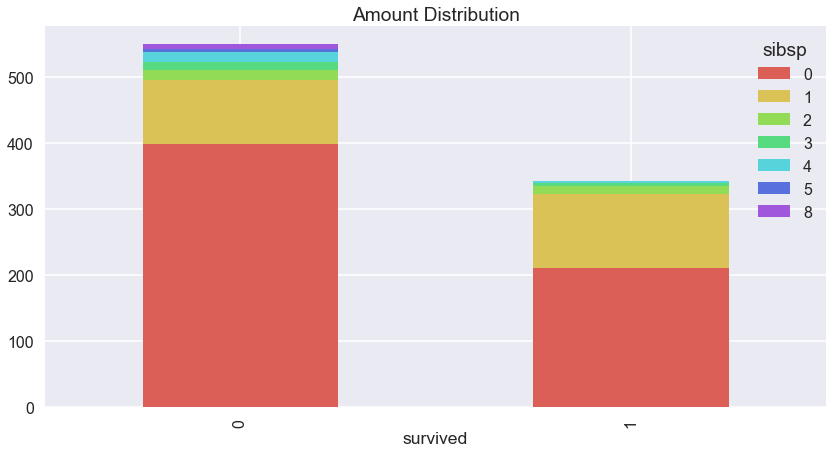

In [172]:
# 幸存和遇难乘客堂兄弟姐妹的数量分布
# 因为兄弟姐妹的数量是离散值，所以没有采用分类箱式图，而是采用的分类堆叠图
sns.set_palette(sns.color_palette("hls", 8))
def stackedPlot2(x, y, data, ):
    def group_func(s):
        return s.value_counts()
    df = data.groupby(x)[y].apply(group_func).unstack()
    ax = df.plot(kind='bar', stacked=True)
    ax.legend(loc='best',title=y)
    ax.set_title(u'Amount Distribution')
# 先看一下数量分布   
stackedPlot2('survived','sibsp',data=data_titanic)

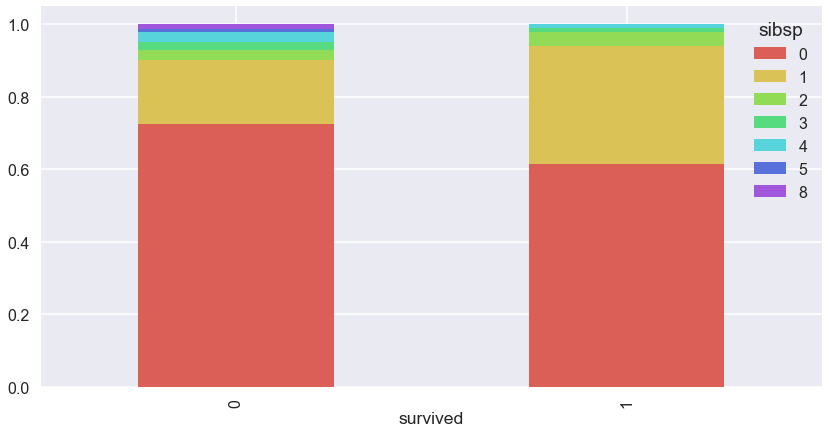

In [173]:
# 再看一下比例分布   
stackedPlot('survived','sibsp',data=data_titanic)

<font color='red'>
1. 大部分人的只有0个或者1个堂兄弟姐妹<br>
2. 未获救的人中，没有堂兄弟姐妹的人占比较高。且最多出现8个堂兄弟姐妹<br>
3. 获救的人中，有1个或着没有堂兄弟姐妹的人占比都比较高。最多只出现4个堂兄弟姐妹<br>
</font>

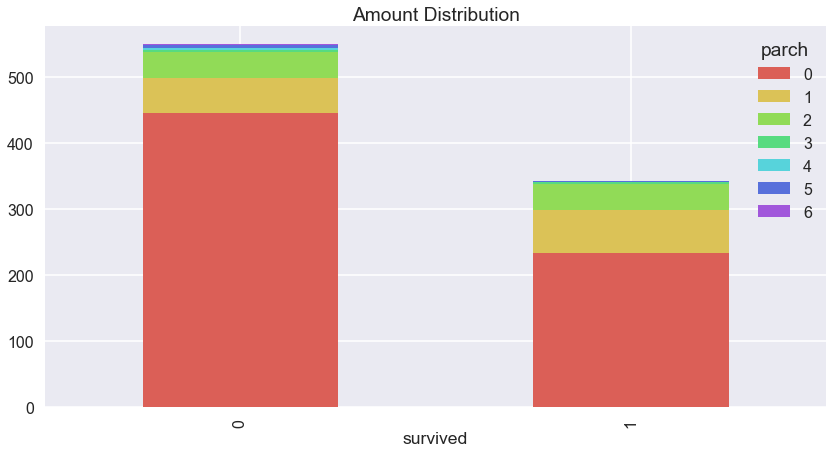

In [175]:
# 幸存和遇难乘客父母子女的数量分布（分类箱式图）
# 先看数量分布图
stackedPlot2('survived','parch',data=data_titanic)

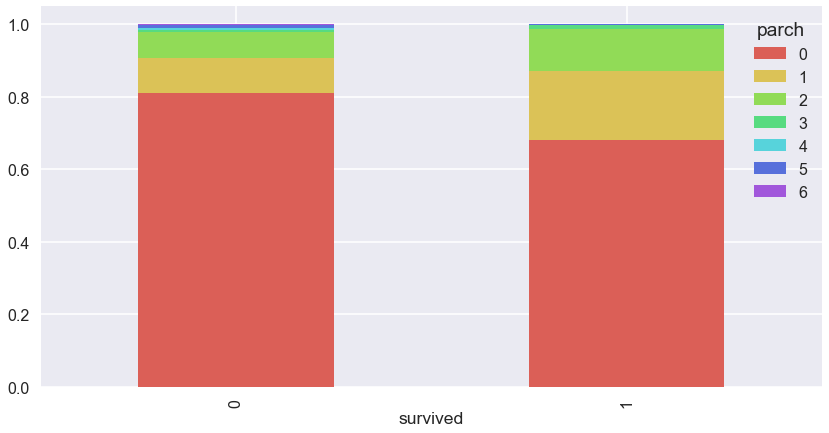

In [176]:
# 再看看比例分布图
stackedPlot('survived','parch',data=data_titanic)

<font color='red'>
1. 大部分人都是独生子女<br>
2. 未获救的人中，独生子女占比较高。且最多出现6个兄弟姐妹<br>
3. 获救的人中，有20%的人有一个兄弟或姐妹。最多只出现4个兄弟姐妹<br>
</font>

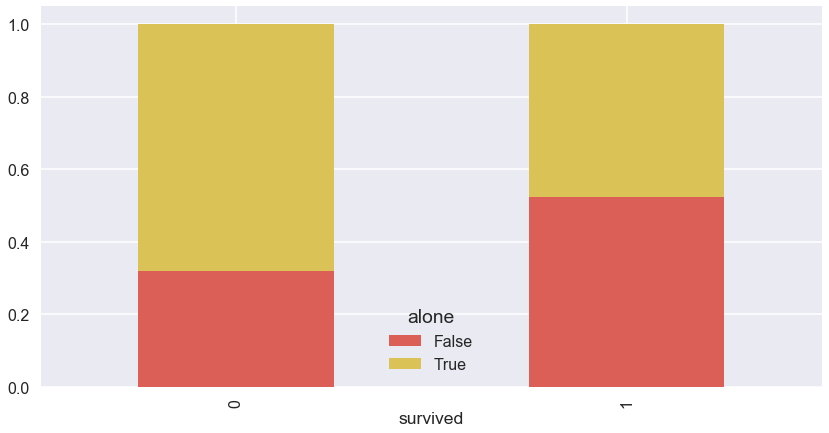

In [177]:
# 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
stackedPlot('survived','alone',data_titanic)

<font color='red'>
相比之下，单独乘船的人最后未获救的概率比较大
<br>